In [25]:
import rasterio as rio
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from rasterstats import zonal_stats
import seaborn as sns
from scipy.stats import spearmanr, pearsonr

raster_dir = '/home/mcoving/Dropbox/sync/projects/Dolines/comparison_data/chelsa_v2/envicloud/chelsa/chelsa_V2/GLOBAL/climatologies/1981-2010/bio/'

raster_key = pd.read_excel('raster-data-key.xlsx', index_col=0)

p_karst_df = gpd.read_file('share/analysis-layers/processed_hucs.shp')
# Raster data is in EPSG:4326
p_karst_df_4326 = p_karst_df.to_crs("4326")

def add_raster_stats_to_df(parameter, raster_key=raster_key):
    raster_dir = raster_key['dir'][parameter]
    raster_filename = raster_key['filename'][parameter]
    full_raster_path = os.path.join(raster_dir, raster_filename)
    scale = raster_key['scale'][parameter]
    offset = raster_key['offset'][parameter]

    with rio.open(full_raster_path) as src:
        affine = src.transform
        nans = src.nodatavals[0]
        array = src.read(1)
        array = array.astype('float')
        array[array==nans] = np.nan
        if src.crs == 4326:
            df_zonal_stats = pd.DataFrame(zonal_stats(p_karst_df_4326, 
                                                  array, 
                                                  affine=affine, 
                                                  all_touched=True))
        
        else:
            #this_p_karst = p_karst_df
            df_zonal_stats = pd.DataFrame(zonal_stats(p_karst_df, 
                                                  array, 
                                                  affine=affine, 
                                                  all_touched=True,
                                                  ))
        #df[parameter] = df_zonal_stats['mean'].values * scale + offset
        means = df_zonal_stats['mean'] * scale + offset
    
    return means

# pretty print key
raster_key


scale  offset  \
parameter                                  
mean annual temp            0.10 -273.15   
mean diurnal temp range     0.10    0.00   
isothermality               0.10    0.00   
temperature seasonality     0.10    0.00   
annual precipitation        0.10    0.00   
precipitation seasonality   0.10    0.00   
net primary productivity    0.10    0.00   
monthly mean pet            0.01    0.00   
cmi mean                    0.10    0.00   
carbonate                   1.00    0.00   
clay                        1.00    0.00   
density                     1.00    0.00   
ksat                        1.00    0.00   
organic matter              1.00    0.00   
ph                          1.00    0.00   
depth res                   1.00    0.00   
rock fragments              1.00    0.00   
sand                        1.00    0.00   
silt                        1.00    0.00   
depth                       1.00    0.00   
water storage               1.00    0.00   

                                                                         dir  \
parameter                                                                      
mean annual temp           /home/mcoving/Dropbox/sync/projects/Dolines/co...   
mean diurnal temp range    /home/mcoving/Dropbox/sync/projects/Dolines/co...   
isothermality              /home/mcoving/Dropbox/sync/projects/Dolines/co...   
temperature seasonality    /home/mcoving/Dropbox/sync/projects/Dolines/co...   
annual precipitation       /home/mcoving/Dropbox/sync/projects/Dolines/co...   
precipitation seasonality  /home/mcoving/Dropbox/sync/projects/Dolines/co...   
net primary productivity   /home/mcoving/Dropbox/sync/projects/Dolines/co...   
monthly mean pet           /home/mcoving/Dropbox/sync/projects/Dolines/co...   
cmi mean                   /home/mcoving/Dropbox/sync/projects/Dolines/co...   
carbonate                  /home/mcoving/Dropbox/sync/projects/Dolines/co...   
clay                       /home/mcoving/Dropbox/sync/projects/Dolines/co...   
density                    /home/mcoving/Dropbox/sync/projects/Dolines/co...   
ksat                       /home/mcoving/Dropbox/sync/projects/Dolines/co...   
organic matter             /home/mcoving/Dropbox/sync/projects/Dolines/co...   
ph                         /home/mcoving/Dropbox/sync/projects/Dolines/co...   
depth res                  /home/mcoving/Dropbox/sync/projects/Dolines/co...   
rock fragments             /home/mcoving/Dropbox/sync/projects/Dolines/co...   
sand                       /home/mcoving/Dropbox/sync/projects/Dolines/co...   
silt                       /home/mcoving/Dropbox/sync/projects/Dolines/co...   
depth                      /home/mcoving/Dropbox/sync/projects/Dolines/co...   
water storage              /home/mcoving/Dropbox/sync/projects/Dolines/co...   

                                                             filename  nodata  
parameter                                                                      
mean annual temp                      CHELSA_bio1_1981-2010_V.2.1.tif   32767  
mean diurnal temp range               CHELSA_bio2_1981-2010_V.2.1.tif   32767  
isothermality                         CHELSA_bio3_1981-2010_V.2.1.tif   32767  
temperature seasonality               CHELSA_bio4_1981-2010_V.2.1.tif   32767  
annual precipitation                 CHELSA_bio12_1981-2010_V.2.1.tif   32767  
precipitation seasonality            CHELSA_bio15_1981-2010_V.2.1.tif   32767  
net primary productivity               CHELSA_npp_1981-2010_V.2.1.tif   32767  
monthly mean pet           CHELSA_pet_penman_mean_1981-2010_V.2.1.tif   32767  
cmi mean                          CHELSA_cmi_mean_1981-2010_V.2.1.tif   32767  
carbonate                                           caco3_kg_sq_m.tif   -9999  
clay                                                         clay.tif   -9999  
density                                                        db.tif   -9999  
ksat                                                 

In [18]:

def add_raster_stats_to_df(parameter, raster_key=raster_key):
    raster_dir = raster_key['dir'][parameter]
    raster_filename = raster_key['filename'][parameter]
    full_raster_path = os.path.join(raster_dir, raster_filename)
    scale = raster_key['scale'][parameter]
    offset = raster_key['offset'][parameter]

    with rio.open(full_raster_path) as src:
        affine = src.transform
        nans = src.nodatavals[0]
        array = src.read(1)
        array = array.astype('float')
        array[array==nans] = np.nan
        if src.crs == 4326:
            df_zonal_stats = pd.DataFrame(zonal_stats(p_karst_df_4326, 
                                                  array, 
                                                  affine=affine, 
                                                  all_touched=True))
        
        else:
            #this_p_karst = p_karst_df
            df_zonal_stats = pd.DataFrame(zonal_stats(p_karst_df, 
                                                  array, 
                                                  affine=affine, 
                                                  all_touched=True,
                                                  ))
        #df[parameter] = df_zonal_stats['mean'].values * scale + offset
        means = df_zonal_stats['mean'] * scale + offset
    
    return means


In [19]:
add_raster_stats_to_df('carbonate')

0          0.000000
1        222.069066
2          2.720950
3          0.527049
4          0.000000
            ...    
29063    214.309471
29064    204.008930
29065     55.415639
29066     49.477061
29067      1.313717
Name: mean, Length: 29068, dtype: float64

In [20]:
means_dict = {}
for param in raster_key.index:
    print("Processing " + param +'...')
    means_dict[param] = add_raster_stats_to_df(param)

Processing mean annual temp...
Processing mean diurnal temp range...
Processing isothermality...
Processing temperature seasonality...
Processing annual precipitation...
Processing precipitation seasonality...
Processing net primary productivity...
Processing monthly mean pet...
Processing cmi mean...
Processing carbonate...
Processing clay...
Processing density...
Processing ksat...
Processing organic matter...
Processing ph...
Processing depth res...
Processing rock fragments...
Processing sand...
Processing silt...
Processing depth...
Processing water storage...


In [26]:
means_df = pd.DataFrame(means_dict)
p_karst_df_with_controls = p_karst_df_4326.join(means_df)


In [27]:
#p_karst_df_4326.to_file('processed_hucs_with_climate_4326.shp')
p_karst_df_with_controls.to_file('processed_hucs_with_controls_4326.shp')

/tmp/ipykernel_3681382/2996100775.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  p_karst_df_with_controls.to_file('processed_hucs_with_controls_4326.shp')


In [35]:
p_karst = p_karst_df_with_controls.p_karst #p_karst_df_4326.p_karst
indep_vars = raster_key.index.values
controls_df = p_karst_df_with_controls[indep_vars]
controls_df

mean annual temp  mean diurnal temp range  isothermality  \
0             19.050000                10.500000       0.376500   
1              9.750000                 9.383333       0.248833   
2              7.079577                 9.250704       0.227394   
3              6.800602                 9.218072       0.226373   
4              6.900000                 9.200000       0.225000   
...                 ...                      ...            ...   
29063         10.123485                 8.072727       0.228962   
29064         10.171918                 8.331507       0.235795   
29065         10.350000                 6.043750       0.176188   
29066         10.417742                 7.674194       0.217419   
29067         23.350000                 5.685714       0.375571   

       temperature seasonality  annual precipitation  \
0                   647.966667           1151.316667   
1                   999.800000            919.083333   
2                  1097.788732            869.397183   
3                  1099.648193            838.373494   
4                  1107.800000            834.100000   
...                        ...                   ...   
29063               958.203030            952.582576   
29064               952.552055            953.108219   
29065              1005.928125           1082.531250   
29066               979.367742           1059.496774   
29067               357.742857           1287.400000   

       precipitation seasonality  net primary productivity  monthly mean pet  \
0                      20.400000               1564.133333        108.348333   
1                      32.950000               1334.016667         91.533333   
2                      49.539437               1152.078873         84.902254   
3                      47.892771               1128.595181         82.448675   
4                      48.350000               1136.900000         84.380000   
...                          ...                       ...               ...   
29063                  20.548485               1369.368939         89.584091   
29064                  20.894521               1369.916438         90.368219   
29065                  22.975000               1437.500000         91.606875   
29066                  25.448387               1443.529032         83.995806   
29067                  70.657143               1683.885714        128.472857   

        cmi mean   carbonate  ...   density       ksat  organic matter  \
0     -15.000000    0.000000  ...  1.569074  39.994703       23.366789   
1     -17.483333  222.069066  ...  1.449282  28.192542       36.778514   
2     -14.656338    2.720950  ...  1.588574  27.041544       17.285168   
3     -14.685542    0.527049  ...  1.609489  21.956245       18.938643   
4     -17.050000    0.000000  ...  1.588142  46.171881       18.655193   
...          ...         ...  ...       ...        ...             ...   
29063 -13.147727  214.309471  ...  1.555906  28.842591       22.874748   
29064 -13.910959  204.008930  ...  1.550224  27.803174       20.084725   
29065  -4.334375   55.415639  ...  1.641361  33.107513       15.167353   
29066   1.341935   49.477061  ...  1.483808  28.676595       32.032791   
29067 -24.285714    1.313717  ...  1.456600  75.502069       42.991240   

             ph   depth res  rock fragments       sand       silt       depth  \
0      5.132461   91.000000        0.016810  55.127066  17.283136  170.900340   
1      7.456642   74.000000        0.011408  24.284954  50.136845  161.418002   
2      6.012992   88.277844        0.039247  54.523773  30.851558  142.098251   
3      5.790546  114.948064        0.081315  58.519349  28.359714  151.468162   
4      6.071539  185.651520        0.070799  67.182538  21.347587  153.016459   
...         ...         ...             ...        ...        ...         ...   
29063  7.297031  111.768616        0.062195  44.882186  29.745964  156.219691   
29064  7.245140   97.634231    

In [36]:
p_karst

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29063    0.0
29064    0.0
29065    0.0
29066    0.0
29067    0.0
Name: p_karst, Length: 29068, dtype: float64

In [39]:
def make_displot(param, 
                 p_karst, 
                 controls_df, 
                 trim_to_min_value = 0.,
                 set_zero_to=None,
                 xlabel=None, 
                 ylabel='Percentage karst drained', 
                 log_scale=(False,True),
                 calculate_correlation='Spearman',):
    if set_zero_to is not None:
        p_karst[p_karst==0] = set_zero_to
    
    if trim_to_min_value>0:
        wantidx = p_karst>trim_to_min_value
        x = controls_df[param][wantidx]
        y = p_karst[wantidx]
#    elif trim_zero:
#        non_zero_p_karst = p_karst>0
#        x = controls_df[param][non_zero_p_karst]
#        y = p_karst[non_zero_p_karst]    
    else:
        x = controls_df[param]
        y = p_karst
    

    sns.displot(x=x,
            y=y,
            log_scale=log_scale,
            )
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    rstring = None
    if calculate_correlation == 'Spearman':
        r, p = spearmanr(x, y, nan_policy='omit')
        rstring = 'rho='+str(r)[:5]
    if calculate_correlation == 'Pearson':
        r, p = pearsonr(x, y, nan_policy='omit')
        rstring = 'R='+str(r)[:5]
    if rstring is not None:
        ax = plt.gca()
        plt.text(0.05,0.95, rstring, transform = ax.transAxes)



In [48]:
controls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29068 entries, 0 to 29067
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mean annual temp           29068 non-null  float64
 1   mean diurnal temp range    29068 non-null  float64
 2   isothermality              29068 non-null  float64
 3   temperature seasonality    29068 non-null  float64
 4   annual precipitation       29068 non-null  float64
 5   precipitation seasonality  29068 non-null  float64
 6   net primary productivity   29068 non-null  float64
 7   monthly mean pet           29068 non-null  float64
 8   cmi mean                   29068 non-null  float64
 9   carbonate                  29065 non-null  float64
 10  clay                       29065 non-null  float64
 11  density                    29065 non-null  float64
 12  ksat                       29065 non-null  float64
 13  organic matter             29065 non-null  flo

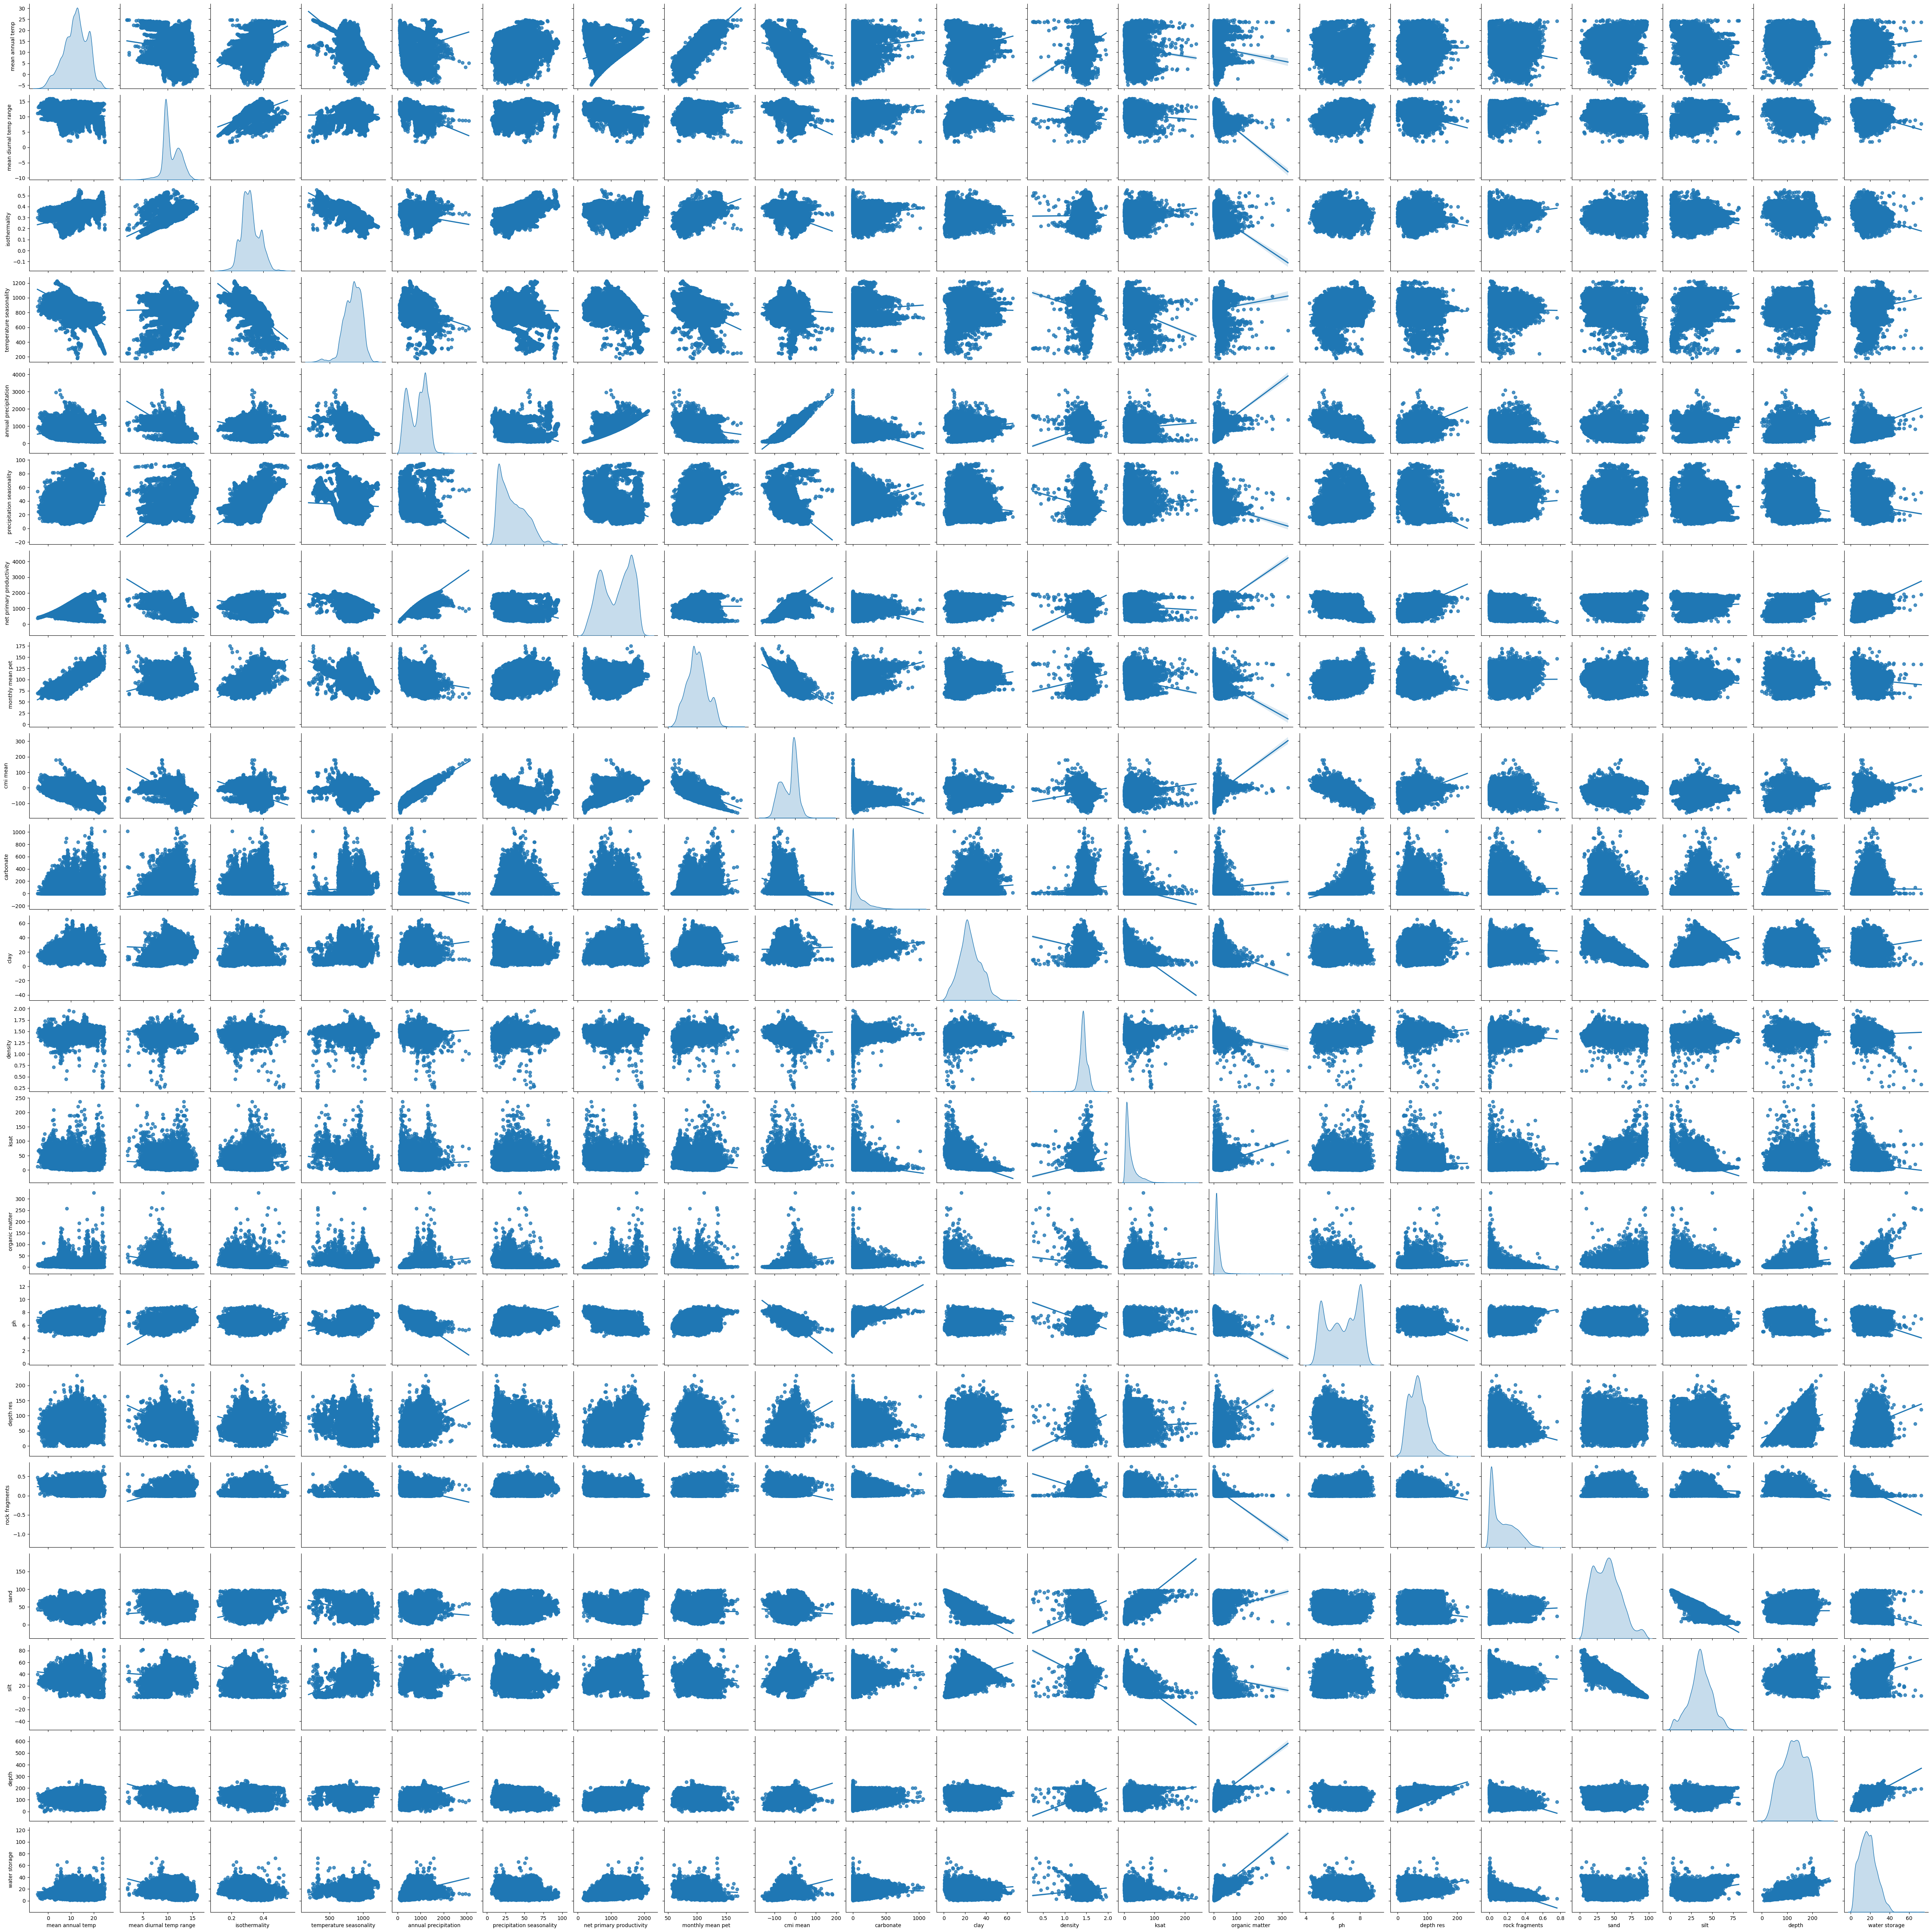

In [44]:
import seaborn as sns

sns.pairplot(controls_df, kind="reg", diag_kind="kde")

/home/mcoving/anaconda3/envs/geo_env/lib/python3.11/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


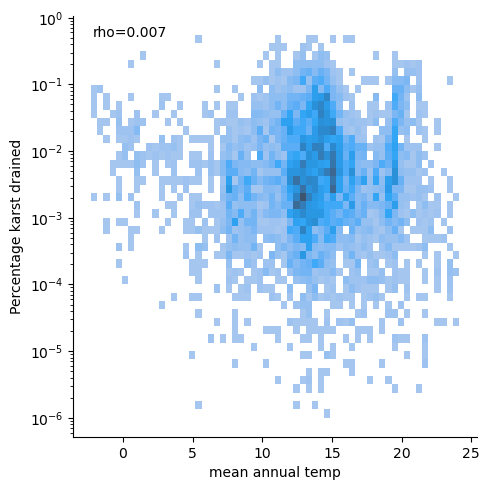

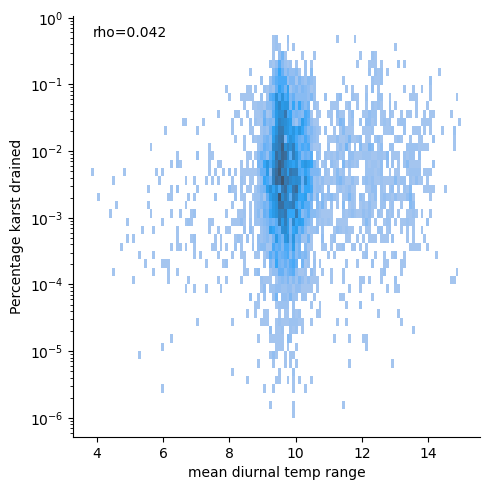

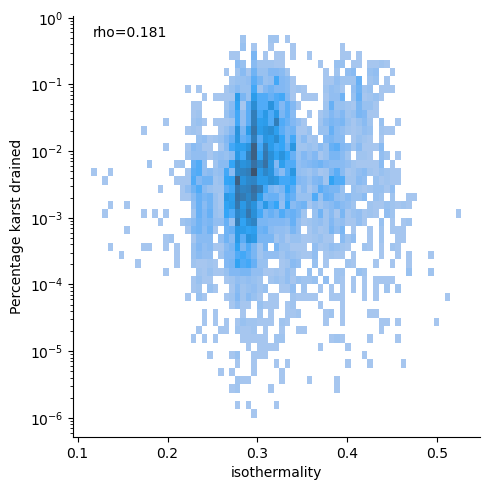

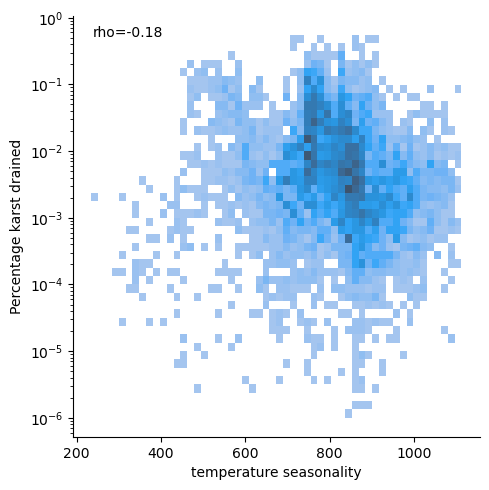

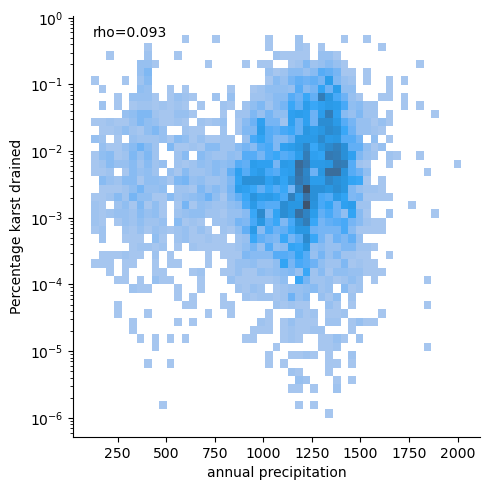

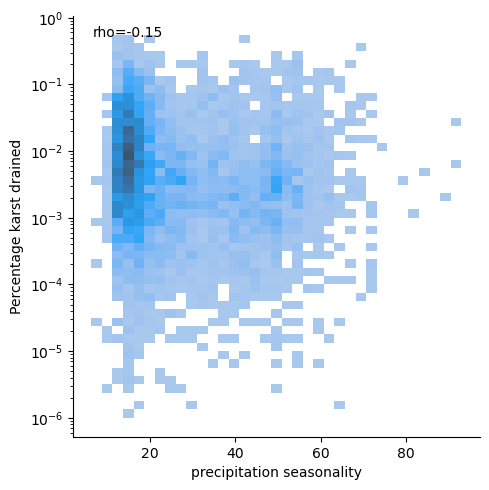

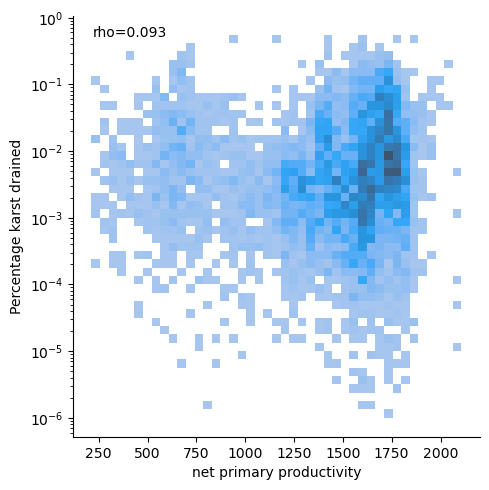

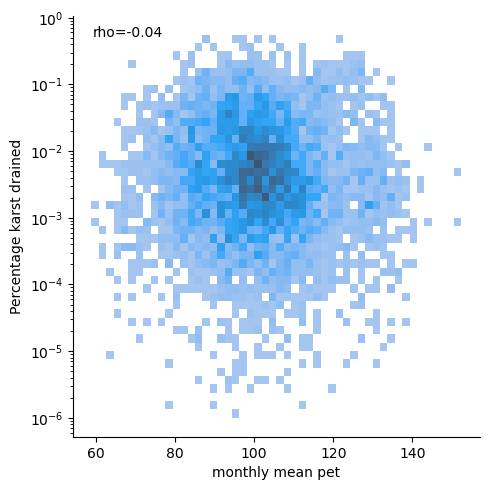

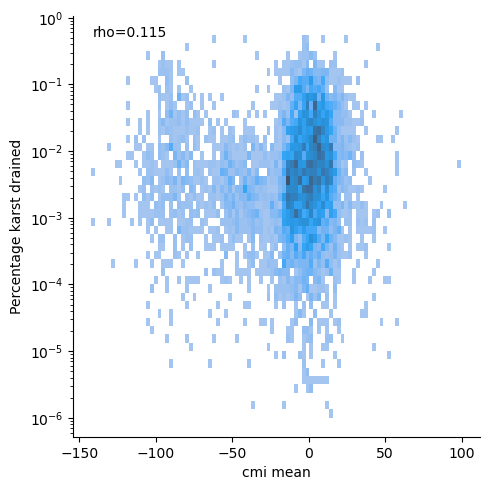

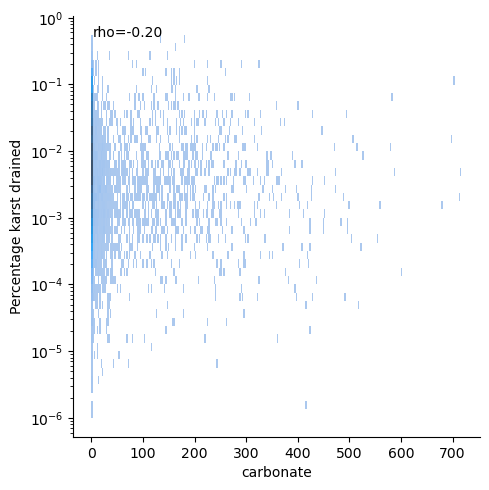

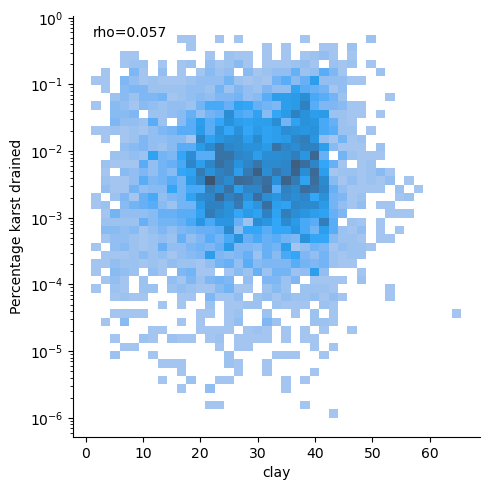

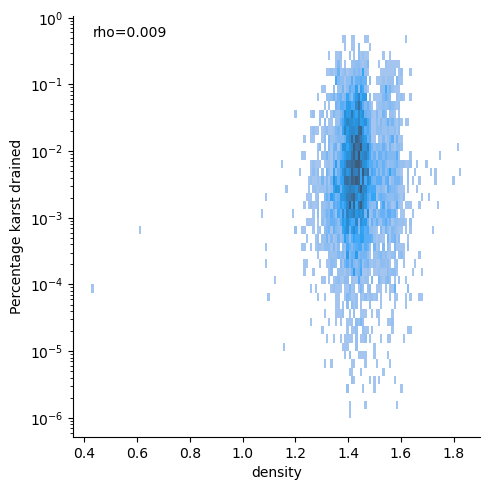

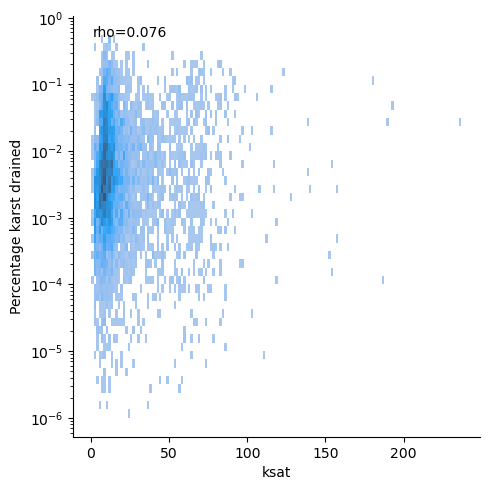

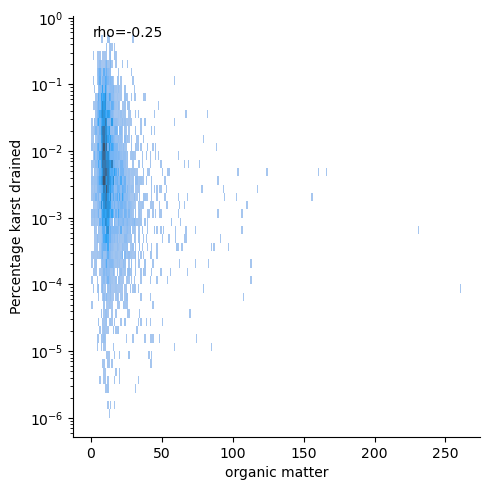

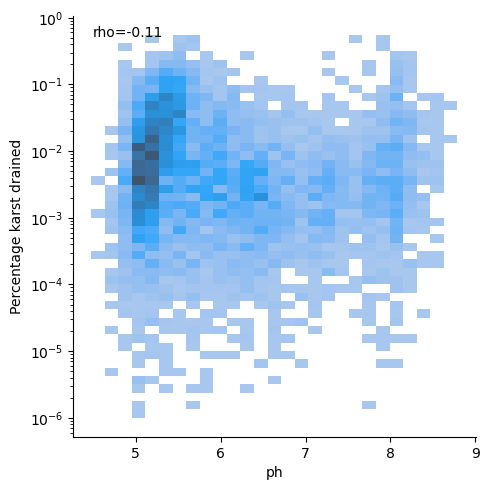

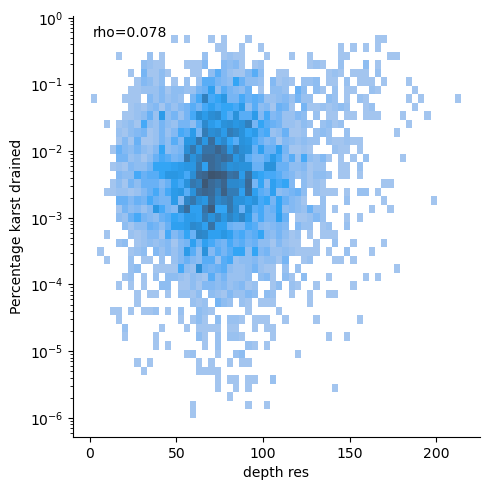

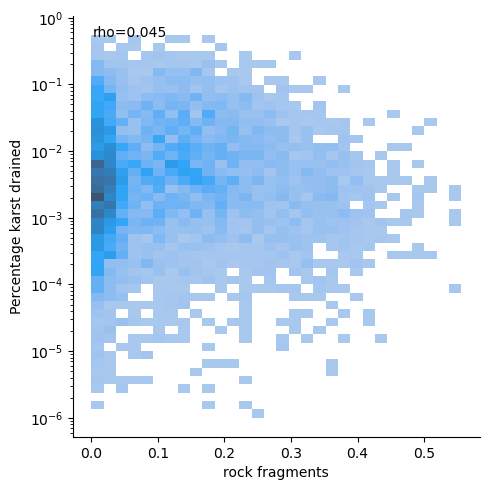

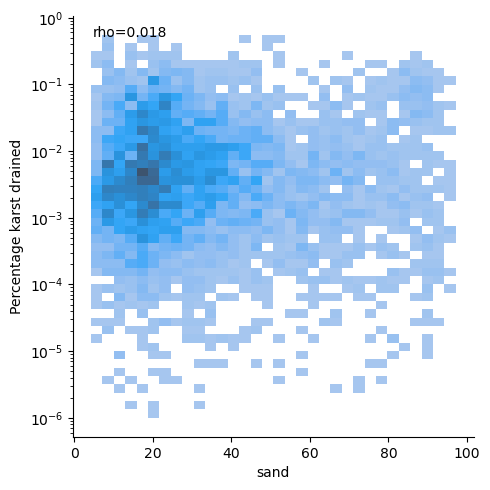

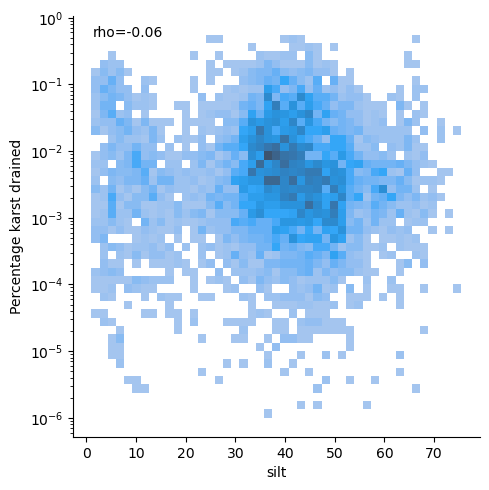

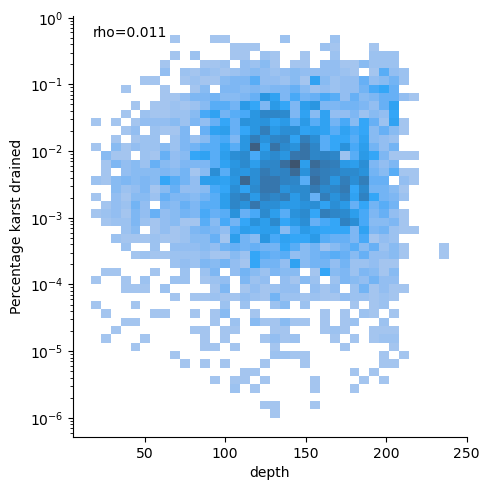

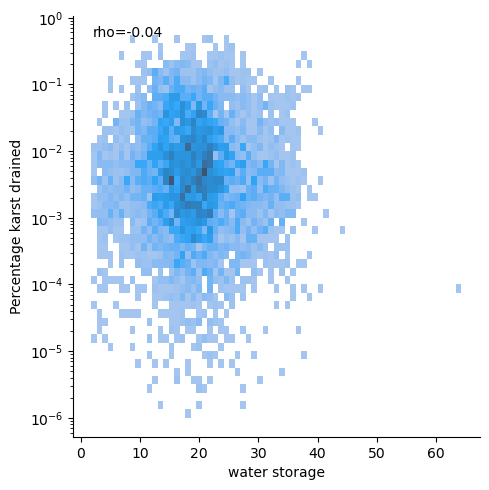

In [43]:
for param in raster_key.index:
     make_displot(param, 
             p_karst.copy(), 
             controls_df,
             trim_to_min_value=1e-6,
             set_zero_to=1e-7
        )

Text(0, 0.5, 'Percent clay')

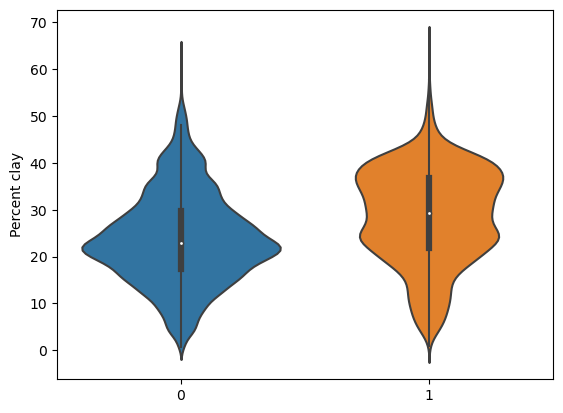

In [54]:
#fig = sns.catplot(p_karst_df_with_controls, x='clay', y='p_karst', kind='violin', log_scale=True)
zeros = p_karst_df_with_controls.p_karst == 0
sns.violinplot([p_karst_df_with_controls.clay[zeros], p_karst_df_with_controls.clay[~zeros]])
plt.ylabel('Percent clay')


Text(0, 0.5, 'Percent sand')

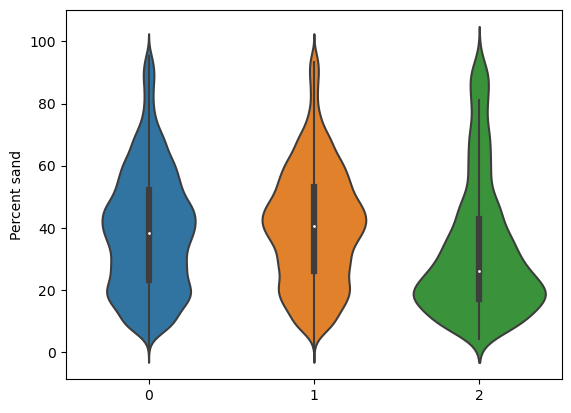

In [59]:
sns.violinplot([p_karst_df_with_controls.sand, p_karst_df_with_controls.sand[zeros], p_karst_df_with_controls.sand[~zeros]])
plt.ylabel('Percent sand')

Text(0, 0.5, 'Percent silt')

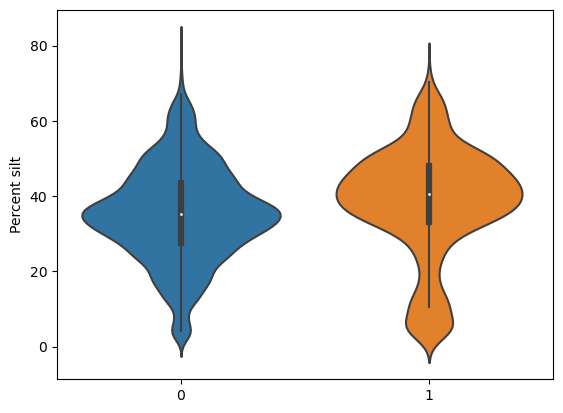

In [56]:
sns.violinplot([p_karst_df_with_controls.silt[zeros], p_karst_df_with_controls.silt[~zeros]])
plt.ylabel('Percent silt')

Text(0, 0.5, 'pH')

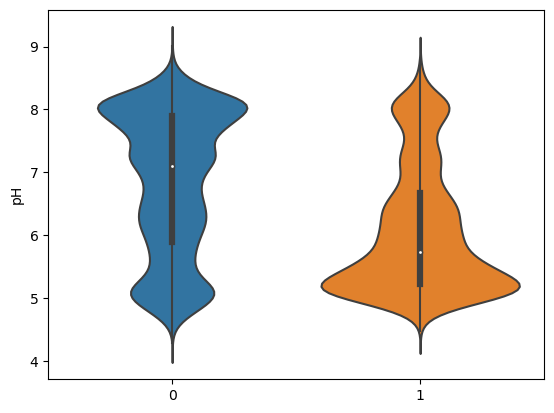

In [66]:
sns.violinplot([p_karst_df_with_controls.ph[zeros], p_karst_df_with_controls.ph[~zeros]])
plt.ylabel('pH')

Text(0, 0.5, 'Organic matter')

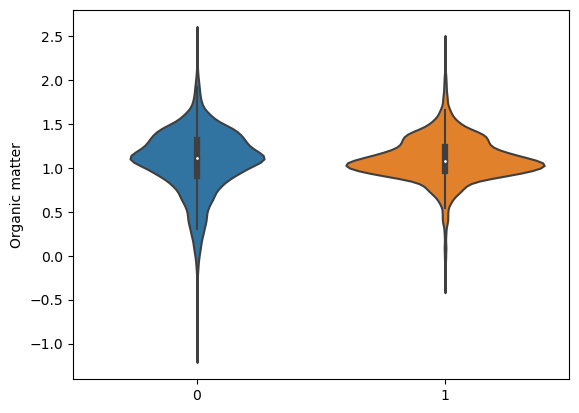

In [65]:
sns.violinplot([np.log10(p_karst_df_with_controls['organic matter'][zeros]), np.log10(p_karst_df_with_controls['organic matter'][~zeros])])
plt.ylabel('Organic matter')

Text(0, 0.5, 'Soil depth (cm)')

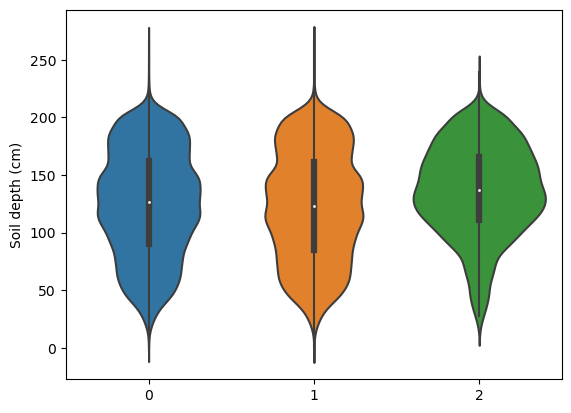

In [58]:
sns.violinplot([p_karst_df_with_controls.depth, p_karst_df_with_controls.depth[zeros], p_karst_df_with_controls.depth[~zeros]])
plt.ylabel('Soil depth (cm)')

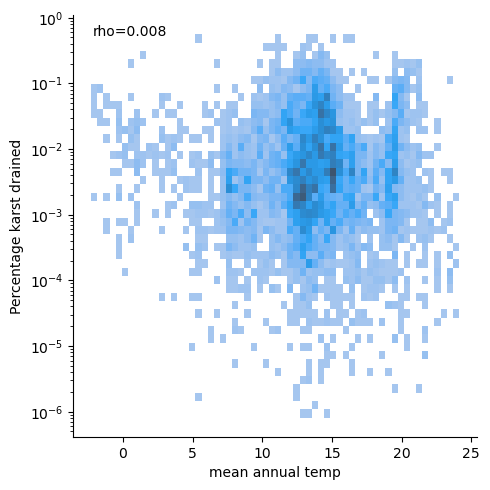

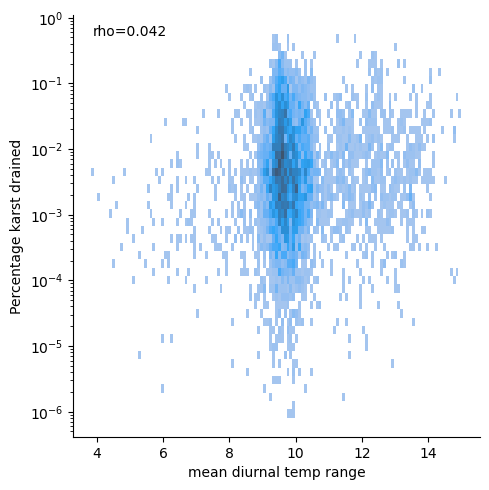

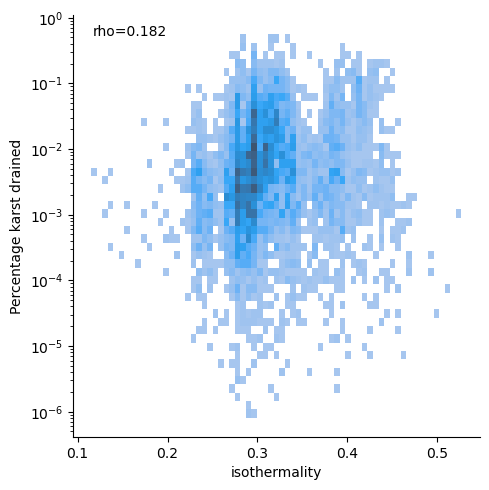

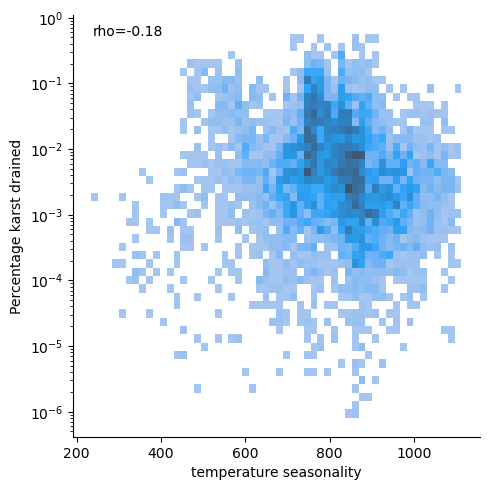

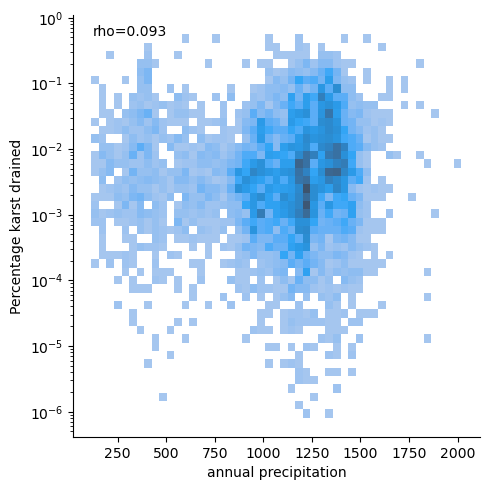

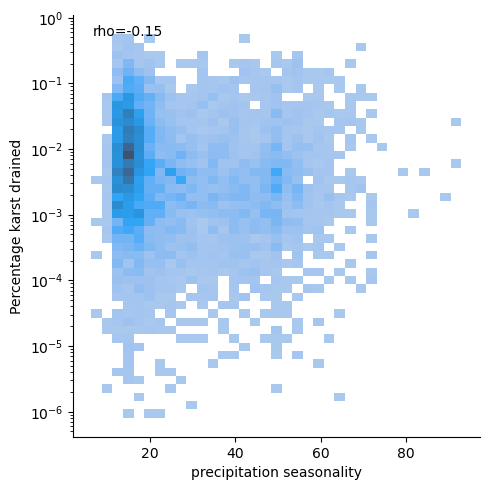

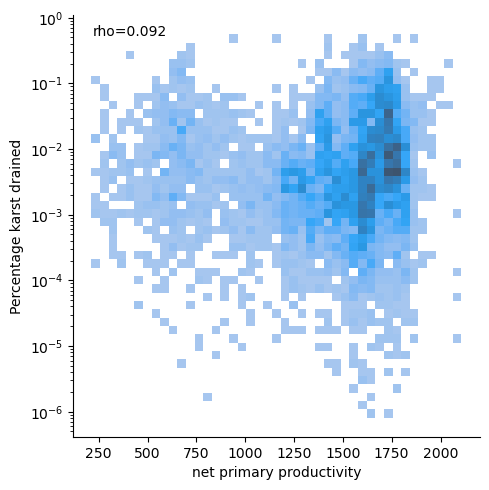

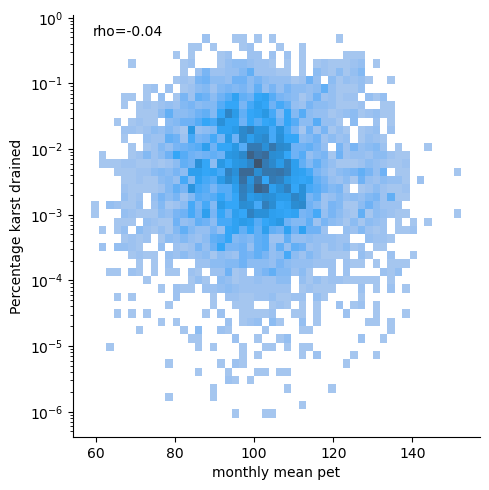

In [15]:
for param in raster_key.index:
     make_displot(param, 
             p_karst.copy(), 
             controls_df,
             trim_zero=True
        )

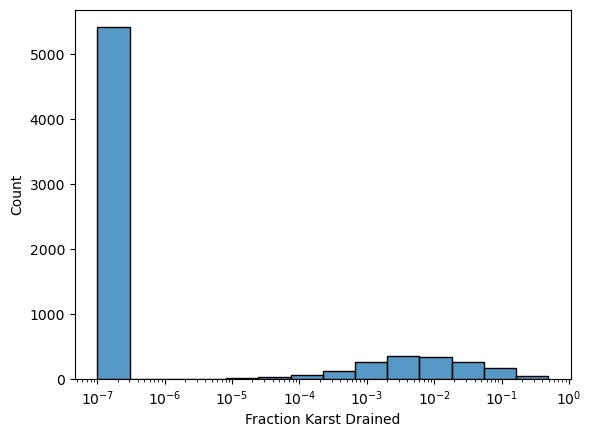

In [89]:
p_karst_no_zeros = p_karst.copy()
p_karst_no_zeros[p_karst_no_zeros==0] = 1e-7
sns.histplot(p_karst_no_zeros, log_scale=True)
plt.xlabel('Fraction Karst Drained')
plt.savefig('p_karst_hist.png')

<AxesSubplot: xlabel='p_karst', ylabel='Count'>

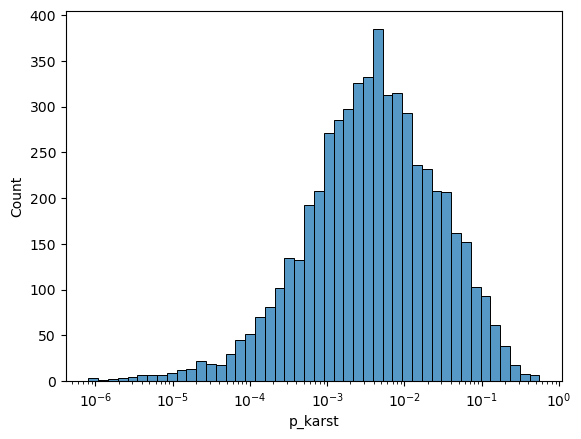

In [20]:
p_karst_trimmed = p_karst[p_karst>0].copy()

sns.histplot(p_karst_trimmed, log_scale=True)

In [2]:
import geopandas as gpd 
p_karst_rocks = gpd.read_file('processed_hucs_with_rocks_5070.shp')


In [1]:
p_karst_df_4326 =gpd.read_file('processed_hucs_with_climate_4326.shp')

NameError: name 'gpd' is not defined

In [4]:
import pandas as pd

In [5]:
different_cols = p_karst_rocks.columns.difference(p_karst_df_4326.columns)
keep_cols = different_cols.append(pd.Index(['huc12']))
p_karst_rocks[keep_cols]

exposure    induration  percent_ar             rocktype1  \
0            E  Consolidated    0.999925  dolostone (dolomite)   
1           B3  Consolidated    0.999960  dolostone (dolomite)   
2          NaN           NaN         NaN                   NaN   
3          NaN           NaN         NaN                   NaN   
4           B3  Consolidated    0.998908                 shale   
...        ...           ...         ...                   ...   
29063       B3  Consolidated    0.551649             sandstone   
29064       B3  Consolidated    1.000000  dolostone (dolomite)   
29065       B3  Consolidated    0.665970  dolostone (dolomite)   
29066       B3  Consolidated    0.937839  dolostone (dolomite)   
29067        E  Consolidated    0.999943             limestone   

                  rocktype2              unit_age  \
0                      sand               Miocene   
1                 sandstone            Ordovician   
2                       NaN                   NaN   
3                       NaN                   NaN   
4                 limestone      Lower Ordovician   
...                     ...                   ...   
29063  dolostone (dolomite)        Lower Devonian   
29064                 shale        Upper Silurian   
29065             limestone              Silurian   
29066             limestone              Silurian   
29067                  sand  Pliocene/Pleistocene   

                                      unit_name         huc12  
0                          "Hawthorn Formation"  030701040804  
1                        Prairie du Chien Group  070900070103  
2                                           NaN  070300051102  
3                                           NaN  070300051004  
4                        Prairie du Chien Group  070300051005  
...                                         ...           ...  
29063                        Sylvania Sandstone  041000010201  
29064                      Bass Island Dolomite  041000010206  
29065                                  Silurian  040400010606  
29066                                  Silurian  071200030306  
29067  Shelly sediments of Plio-Pleistocene age  030902050608  

[29068 rows x 8 columns]

In [6]:
different_cols = p_karst_rocks.columns.difference(p_karst_df_4326.columns)
keep_cols = different_cols.append(pd.Index(['huc12']))


p_rocks_and_climate = p_karst_rocks[keep_cols].merge(p_karst_df_4326, on='huc12', how='inner', copy=True)
p_rocks_and_climate

exposure    induration  percent_ar             rocktype1  \
0            E  Consolidated    0.999925  dolostone (dolomite)   
1           B3  Consolidated    0.999960  dolostone (dolomite)   
2          NaN           NaN         NaN                   NaN   
3          NaN           NaN         NaN                   NaN   
4           B3  Consolidated    0.998908                 shale   
...        ...           ...         ...                   ...   
29063       B3  Consolidated    0.551649             sandstone   
29064       B3  Consolidated    1.000000  dolostone (dolomite)   
29065       B3  Consolidated    0.665970  dolostone (dolomite)   
29066       B3  Consolidated    0.937839  dolostone (dolomite)   
29067        E  Consolidated    0.999943             limestone   

                  rocktype2              unit_age  \
0                      sand               Miocene   
1                 sandstone            Ordovician   
2                       NaN                   NaN   
3                       NaN                   NaN   
4                 limestone      Lower Ordovician   
...                     ...                   ...   
29063  dolostone (dolomite)        Lower Devonian   
29064                 shale        Upper Silurian   
29065             limestone              Silurian   
29066             limestone              Silurian   
29067                  sand  Pliocene/Pleistocene   

                                      unit_name         huc12  objectid  \
0                          "Hawthorn Formation"  030701040804      12.0   
1                        Prairie du Chien Group  070900070103      27.0   
2                                           NaN  070300051102      42.0   
3                                           NaN  070300051004      58.0   
4                        Prairie du Chien Group  070300051005      60.0   
...                                         ...           ...       ...   
29063                        Sylvania Sandstone  041000010201  103569.0   
29064                      Bass Island Dolomite  041000010206  103570.0   
29065                                  Silurian  040400010606  104777.0   
29066                                  Silurian  071200030306  104780.0   
29067  Shelly sediments of Plio-Pleistocene age  030902050608  106155.0   

                                        tnmid  ... p_karst mean annua  \
0      {6505F355-D2F5-4F5B-B23D-28B9D65EDB67}  ...     0.0  19.050000   
1      {329AC928-B27E-451C-9894-0EA1323E83A5}  ...     0.0   9.750000   
2      {43CCC933-9A3E-4943-A5D4-38A2374DFF50}  ...     0.0   7.079577   
3      {7081B289-7E36-481F-A64D-18FBDE5DB836}  ...     0.0   6.800602   
4      {37EC3111-2E10-4A97-B1C5-18EE0E4D054B}  ...     0.0   6.900000   
...                                       ...  ...     ...        ...   
29063  {ED7FEC3A-64D8-4E88-B71D-BAC0AF2D08A7}  ...     0.0  10.123485   
29064  {689F2122-77D4-46C1-87CB-24DABA95ACA2}  ...     0.0  10.171918   
29065  {B87206FE-1494-42F7-B646-18BA7F4900BF}  ...     0.0  10.350000   
29066  {943FC0FF-C818-41FD-A5B6-FFE687FC836D}  ...     0.0  10.417742   
29067  {166DA791-A5F8-43A7-AD6C-EA396D591C57}  ...     0.0  23.350000   

      mean diurn  isothermal   temperatur   annual pre  precipitat  \
0      10.500000    0.376500   647.966667  1151.316667   20.400000   
1       9.383333    0.248833   999.800000   919.083333   32.950000   
2       9.250704    0.227394  1097.788732   869.397183   49.539437   
3       9.218072    0.226373  1099.648193   838.373494   47.892771   
4       9.200000    0.225000  1107.800000   834.100000   48.350000   
...          ...         ...          ...          ...         ...   
29063   8.072727    0.228962   958.203030   952.582576   20.548485   
29064   8.331507    0.235795   952.552055   953.108219   20.894521   
29065   6.043750    0.176188  1005.928125  1082.531250   22.975000   
29066   7.674194    0.217419   979.367742  1059.496774   25.448387   
29067   5.685714    0.375571

In [40]:
limestones = p_rocks_and_climate[p_rocks_and_climate.rocktype1=='limestone']


In [43]:
raster_key.index.values

array(['mean annual temp', 'mean diurnal temp range', 'isothermality',
       'temperature seasonality', 'annual precipitation',
       'precipitation seasonality', 'net primary productivity',
       'monthly mean pet'], dtype=object)

In [119]:
raster_key.index

Index(['mean annua', 'mean diurn', 'isothermal', 'temperatur', 'annual pre',
       'precipitat', 'net primar', 'monthly me'],
      dtype='object', name='parameter')

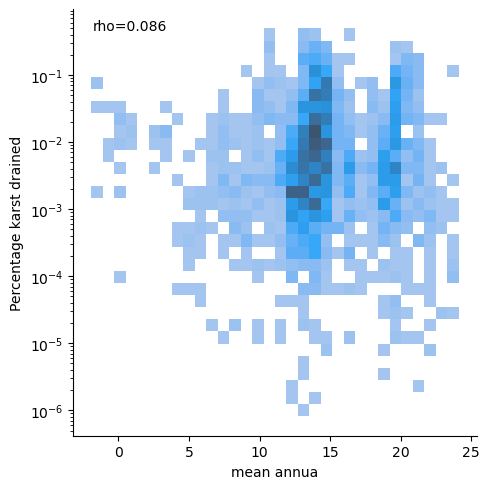

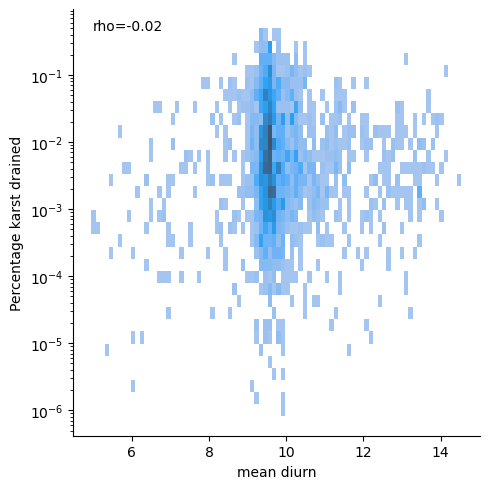

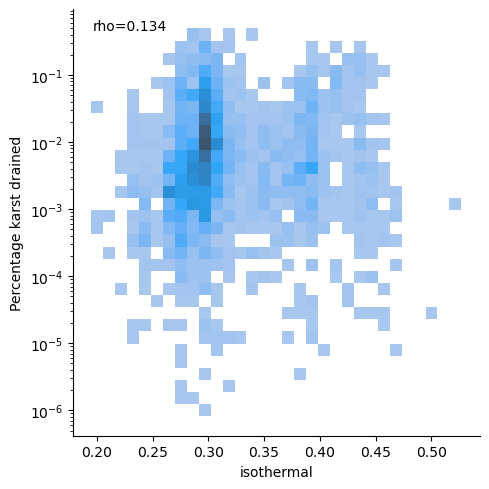

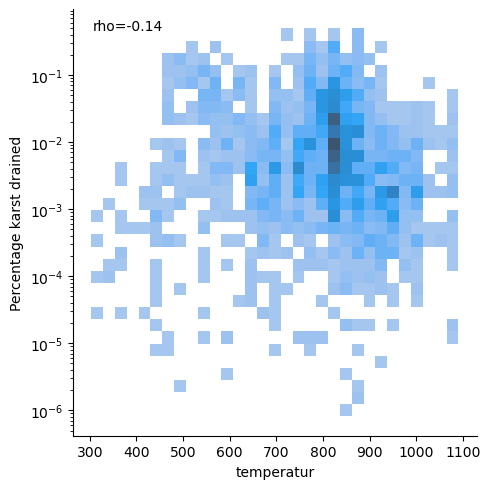

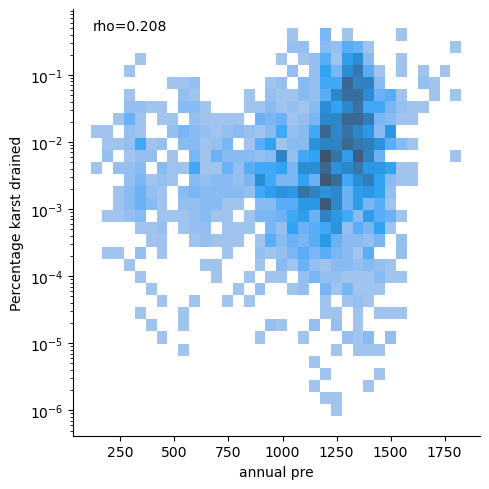

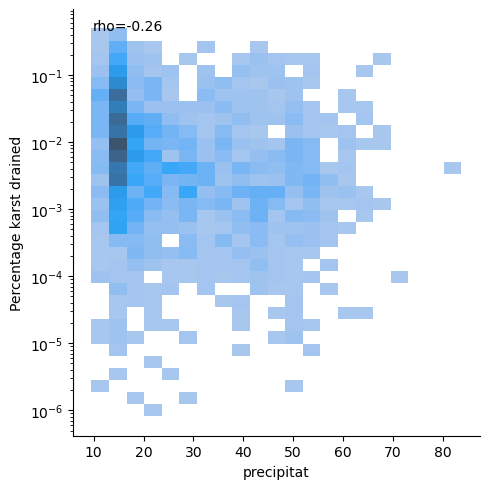

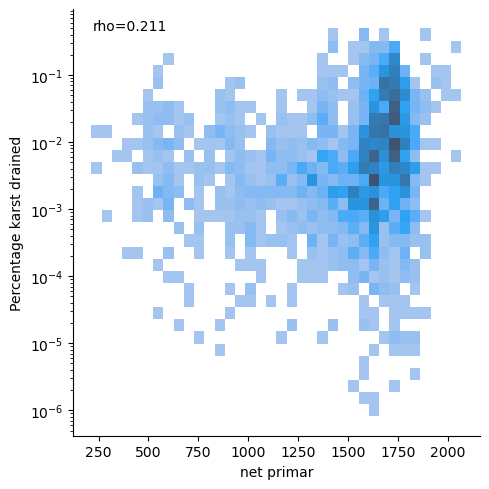

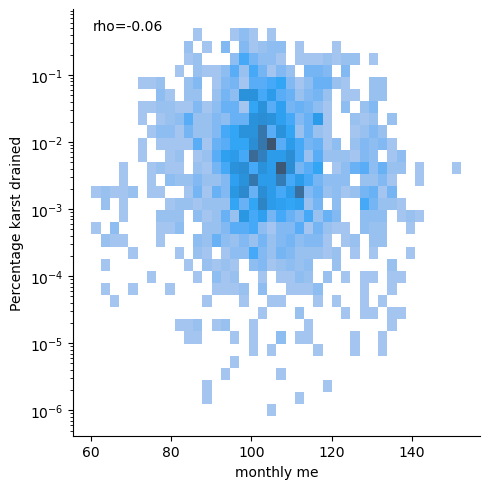

In [47]:
p_karst = limestones.p_karst
indep_vars = raster_key.index.values
for i, item in enumerate(indep_vars):
     indep_vars[i] = item[:10]
controls_df = limestones[indep_vars]



for param in raster_key.index:

     make_displot(param, 
             limestones.p_karst.copy(), 
             controls_df,
             ylabel='Fraction karst drained',
             xlabel=''
             #trim_zero=False,
             #set_zero_to=1e-7
        )

mean annual temp  mean diurnal temp range  isothermality  \
0             19.050000                10.500000       0.376500   
1              9.750000                 9.383333       0.248833   
2              7.079577                 9.250704       0.227394   
3              6.800602                 9.218072       0.226373   
4              6.900000                 9.200000       0.225000   
...                 ...                      ...            ...   
29063         10.123485                 8.072727       0.228962   
29064         10.171918                 8.331507       0.235795   
29065         10.350000                 6.043750       0.176188   
29066         10.417742                 7.674194       0.217419   
29067         23.350000                 5.685714       0.375571   

       temperature seasonality  annual precipitation  \
0                   647.966667           1151.316667   
1                   999.800000            919.083333   
2                  1097.788732            869.397183   
3                  1099.648193            838.373494   
4                  1107.800000            834.100000   
...                        ...                   ...   
29063               958.203030            952.582576   
29064               952.552055            953.108219   
29065              1005.928125           1082.531250   
29066               979.367742           1059.496774   
29067               357.742857           1287.400000   

       precipitation seasonality  net primary productivity  monthly mean pet  
0                      20.400000               1564.133333        108.348333  
1                      32.950000               1334.016667         91.533333  
2                      49.539437               1152.078873         84.902254  
3                      47.892771               1128.595181         82.448675  
4                      48.350000               1136.900000         84.380000  
...                          ...                       ...               ...  
29063                  20.548485               1369.368939         89.584091  
29064                  20.894521               1369.916438         90.368219  
29065                  22.975000               1437.500000         91.606875  
29066                  25.448387               1443.529032         83.995806  
29067                  70.657143               1683.885714        128.472857  

[29068 rows x 8 columns]

In [7]:
p_rocks_and_climate_no_zeros = p_rocks_and_climate[p_rocks_and_climate.p_karst>0]

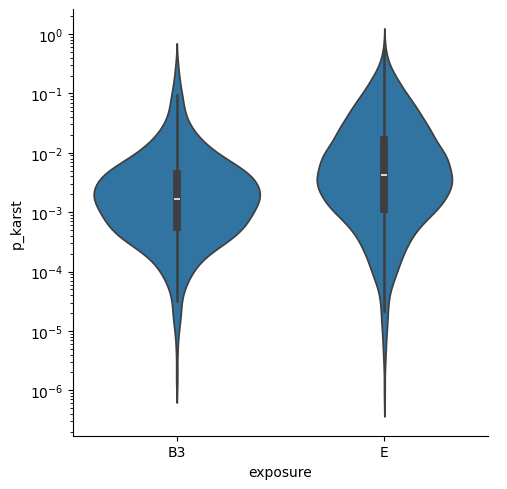

In [10]:
import seaborn as sns
fig = sns.catplot(p_rocks_and_climate_no_zeros, x='exposure', y='p_karst', kind='violin', log_scale=True)


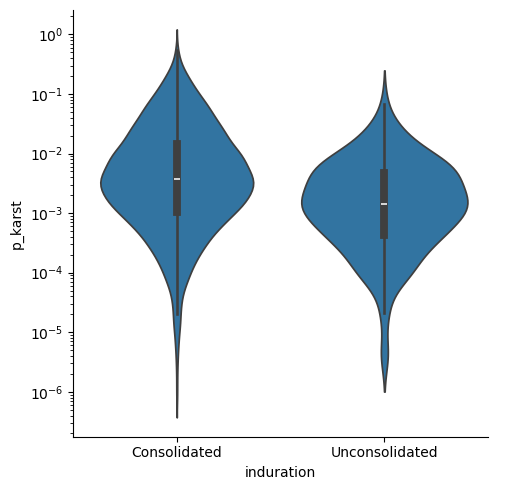

In [23]:
import seaborn as sns
fig = sns.catplot(p_rocks_and_climate_no_zeros, x='induration', y='p_karst', kind='violin', log_scale=True)


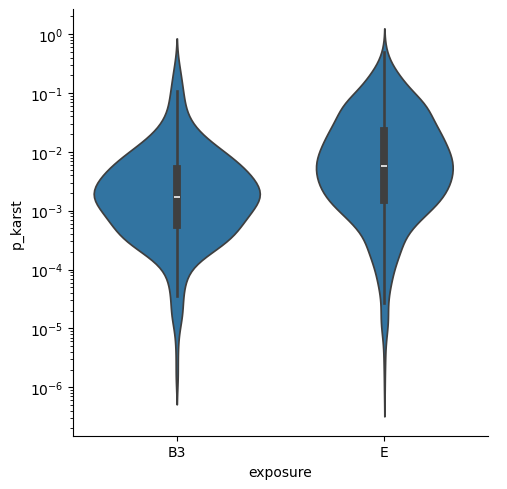

In [17]:
limestones_no_zeros = limestones[limestones.p_karst>0]
fig = sns.catplot(limestones_no_zeros, x='exposure', y='p_karst', kind='violin', log_scale=True)


In [18]:
high_karst = p_rocks_and_climate[p_rocks_and_climate.p_karst>0.1]
high_karst

exposure    induration  percent_ar             rocktype1  \
114          E  Consolidated    0.699581             limestone   
130          E  Consolidated    0.663610             limestone   
134          E  Consolidated    0.612878             limestone   
137          E  Consolidated    0.677525             limestone   
138          E  Consolidated    0.999948             limestone   
...        ...           ...         ...                   ...   
27500      NaN           NaN         NaN                   NaN   
28404        E  Consolidated    0.727397  dolostone (dolomite)   
29007        E  Consolidated    1.000000             limestone   
29045      NaN           NaN         NaN                   NaN   
29048        E  Consolidated    0.706908             limestone   

                  rocktype2             unit_age  \
114                mudstone        Mississippian   
130    dolostone (dolomite)               Eocene   
134    dolostone (dolomite)               Eocene   
137    dolostone (dolomite)               Eocene   
138    dolostone (dolomite)               Eocene   
...                     ...                  ...   
27500                   NaN                  NaN   
28404             limestone  Cambrian-Ordovician   
29007  dolostone (dolomite)               Eocene   
29045                   NaN                  NaN   
29048  dolostone (dolomite)               Eocene   

                                     unit_name         huc12  objectid  \
114                           Bangor Limestone  031601110208     659.0   
130                            Ocala Limestone  030801020600     779.0   
134                            Ocala Limestone  030801020900     783.0   
137                            Ocala Limestone  031002080800     789.0   
138                            Ocala Limestone  031101010202     790.0   
...                                        ...           ...       ...   
27500                                      NaN  120800050501   95348.0   
28404  Chepultepec and Copper Ridge Formations  060102060305   97498.0   
29007                          Ocala Limestone  031002080704  102790.0   
29045                                      NaN  031002070203  102868.0   
29048                          Ocala Limestone  030801021204  102871.0   

                                        tnmid  ...   p_karst mean annua  \
114    {FB91FFD5-90BF-498A-8799-EFD70BC6AB96}  ...  0.157097  16.207447   
130    {029F94FE-455D-4B35-A421-70EB5548307C}  ...  0.162404  20.860720   
134    {01D92268-C3C0-4085-92D3-6A3F228EB241}  ...  0.131130  20.509588   
137    {98AECB9A-D0B9-4E6D-AB2C-B466B36B74E6}  ...  0.117040  21.157227   
138    {7256A945-0867-4D30-B2DE-32743D97C4F2}  ...  0.216953  20.364583   
...                                       ...  ...       ...        ...   
27500  {178061FE-6E4F-4F14-AD76-12C263E89DC9}  ...  0.109876  17.802174   
28404  {FE994447-9D01-4777-BA2E-981313FA4703}  ...  0.154608  13.003659   
29007  {17FA9547-833E-4EC2-B9A5-029221972A86}  ...  0.174452  21.350000   
29045  {333CC6D0-96AB-4261-961B-029EA3A4C251}  ...  0.187124  21.361765   
29048  {73D31DE0-AED2-4468-AA36-D8EBA62C1B79}  ...  0.152267  20.719620   

      mean diurn  isothermal  temperatur   annual pre  precipitat  \
114     9.659574    0.331787  719.863830  1533.953191   12.731915   
130     9.905666    0.434069  493.870138  1326.950077   45.451761   
134    10.090309    0.432513  507.433196  1320.955876   43.146598   
137     9.702148    0.432711  485.917383  1313.852539   47.169141   
138    10.293750    0.432146  520.520833  1322.768750   42.533333   
...          ...         ...         ...          ...         ...   
27500  12.621739    0.409435  739.569565   399.021739   45.091304   
28404   9.496748    0.314829  759.536585  1302.331707   14.625203   
29007   9.540000    0.431700  479.050000  1288.230000   48.610000   
29045   9.582353    0.439765  475.773529  1343.947059   52.770588   
29048   9.805696    0.427158  498.67341

In [19]:
high_karst.rocktype1.unique()

array(['limestone', 'sand', 'shale', nan, 'sandstone',
       'dolostone (dolomite)', 'carbonate', 'fine-grained mixed clastic'],
      dtype=object)

In [20]:
high_karst.rocktype2.unique()

array(['mudstone', 'dolostone (dolomite)', 'clay or mud', 'shale',
       'limestone', nan, 'sandstone', 'clastic',
       'fine-grained mixed clastic', 'dolostone', 'chert'], dtype=object)

In [37]:
exposed_limestone = limestones[limestones.exposure=='E']


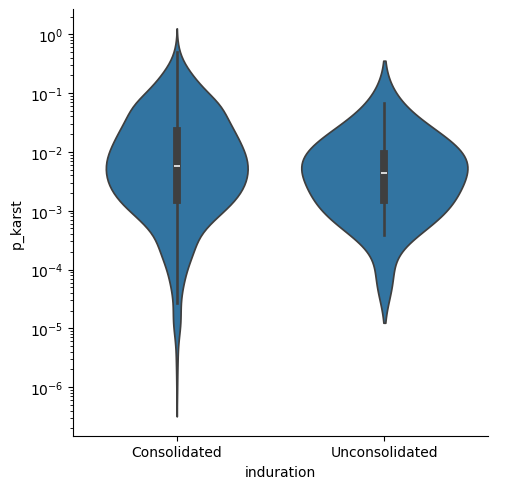

In [38]:
exposed_limestones_no_zeros = exposed_limestone[exposed_limestone.p_karst>0]
fig = sns.catplot(exposed_limestones_no_zeros, x='induration', y='p_karst', kind='violin', log_scale=True)


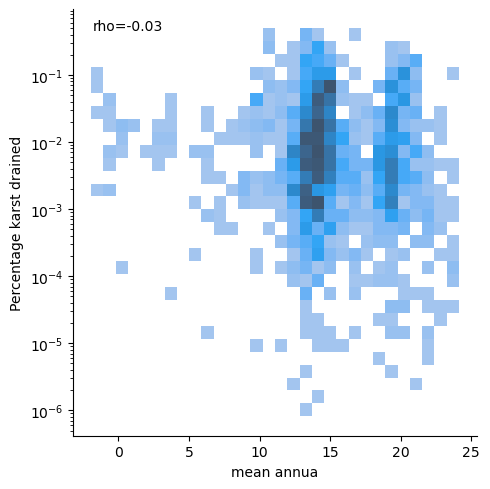

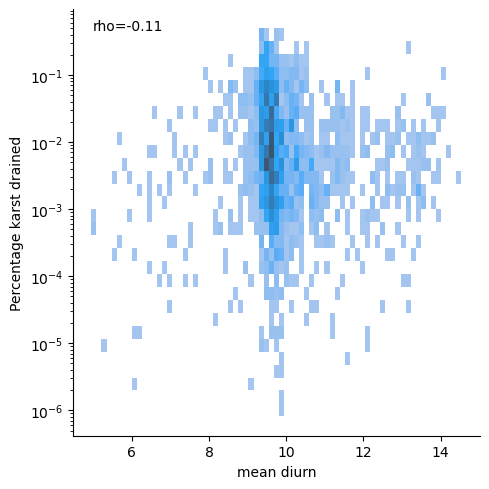

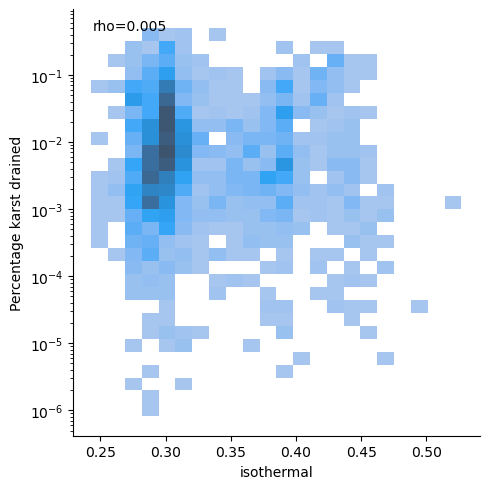

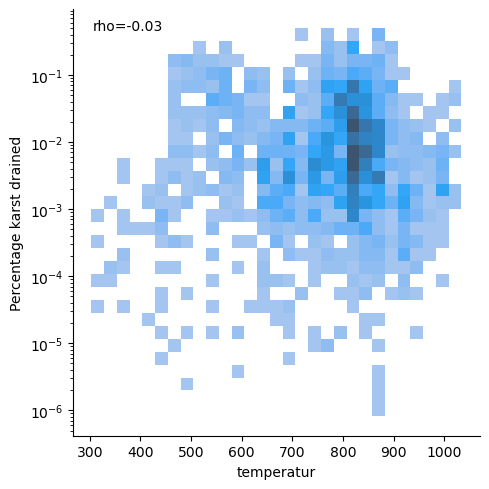

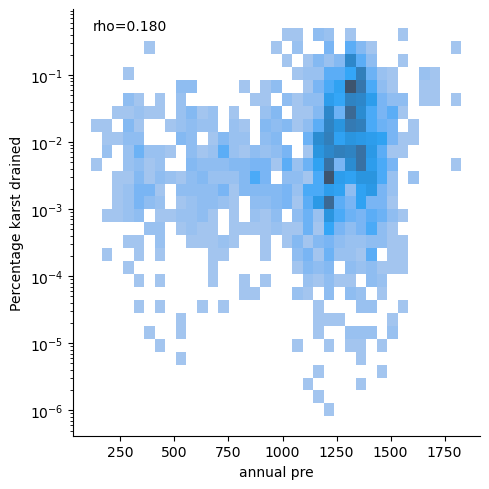

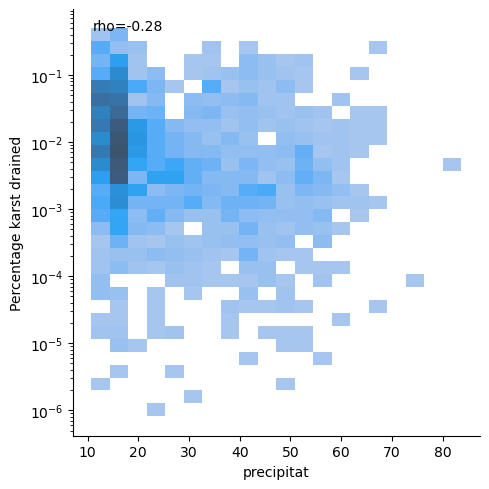

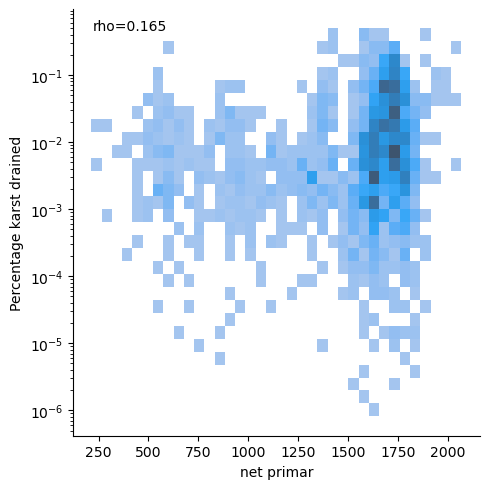

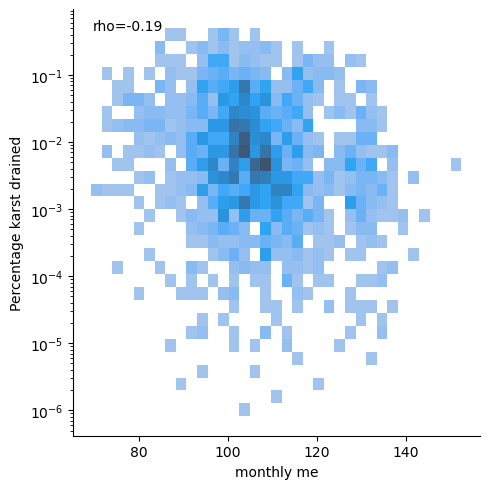

In [50]:
p_karst = exposed_limestone.p_karst
#indep_vars = raster_key.index.values
controls_df = exposed_limestone[indep_vars]

for param in raster_key.index:
     make_displot(param, 
             exposed_limestone.p_karst.copy(), 
             controls_df,
             #trim_zero=False,
             #set_zero_to=1e-7
        )

In [25]:
unconsolidated = p_karst_rocks[p_karst_rocks.induration=='Unconsolidated']

In [31]:
unconsolidated.rocktype1.unique()

array(['sand', 'mixed clastic/carbonate', 'carbonate', 'clay or mud',
       'limestone', 'terrace'], dtype=object)

In [28]:
unconsolidated.unit_name.unique()

array(['Chesapeake Group', 'Jackson Group',
       'Selma Group; Mooreville Chalk', 'Selma Group; Demopolis Chalk',
       'Marlbrook Marl', 'Midway Group; Porters Creek Formation',
       'Selma Group; Prairie Bluff Chalk', 'Arkadelphia Marl',
       'Eocene undifferentiated',
       'Lower Tertiary-Cretaceous undifferentiated',
       'Chesapeake Group; Choptank Formation',
       'Chesapeake Group; Calvert Formation', 'Lower Tertiary Deposits',
       'Austin Chalk', 'Cooper Marl',
       'Pleistocene-Pliocene sands and gravels',
       'Porters Creek formation', 'McBean Formation',
       'Black Creek Formation', 'Duplin Formation',
       'Middendorf Formation', 'Pecan Gap Chalk',
       'Gober Chalk and Roxton Limestone', 'Mt. Laurel Formation',
       'Demopolis Formation', 'Annona Chalk', 'Ector Chalk',
       'Huber/Lisbon/Barnwell Formations, undivided',
       'Vincentown Formation', 'Brownstown Marl', 'Nacatoch Sand',
       'Demopolis chalk', 'Mooreville chalk',
       'Pr

In [61]:
p_rocks_and_climate['nonzero'] = p_rocks_and_climate.p_karst>0

In [62]:
p_rocks_and_climate['nonzero']

0          False
1          False
2          False
3          False
4          False
           ...  
29064      False
29065      False
29066      False
29067      False
nonzero    False
Name: nonzero, Length: 29069, dtype: bool

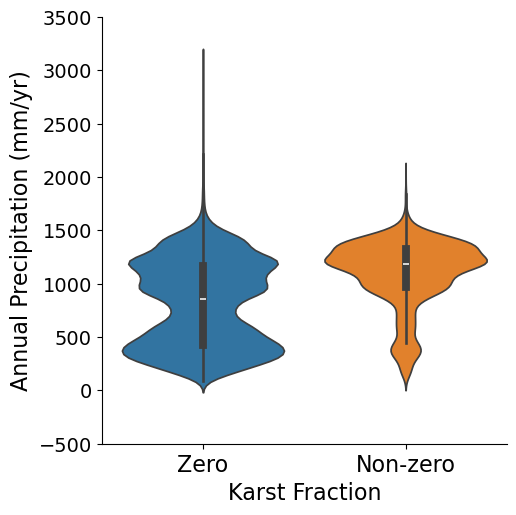

In [118]:
def nz_formatter(nonzero):
    if nonzero:
        return 'Non-zero'
    else:
        return 'Zero'
    
g=sns.catplot(p_rocks_and_climate, x='nonzero', y='annual pre', kind='violin', formatter=nz_formatter, hue='nonzero', legend=False)
plt.ylabel('Annual Precipitation (mm/yr)', fontsize=16)
plt.xlabel('Karst Fraction', fontsize=16)

g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=14)

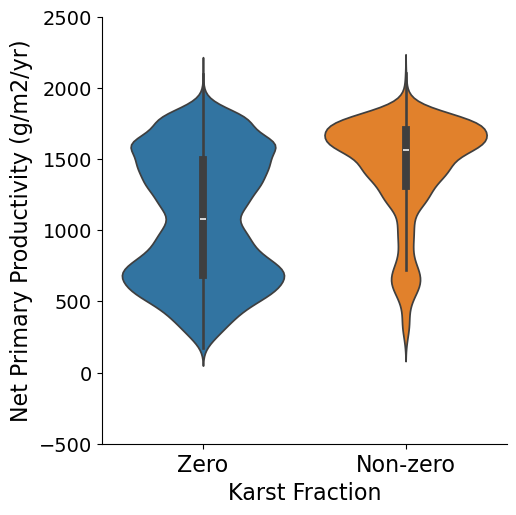

In [116]:
g=sns.catplot(p_rocks_and_climate, x='nonzero', y='net primar', kind='violin', hue ='nonzero', legend=False, formatter=nz_formatter )
plt.ylabel('Net Primary Productivity (g/m2/yr)', fontsize=16)
plt.xlabel('Karst Fraction', fontsize=16)
g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=14)

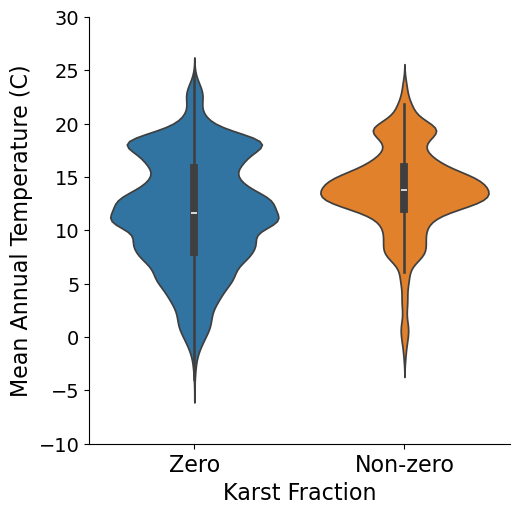

In [117]:
g= sns.catplot(p_rocks_and_climate, x='nonzero', y='mean annua', kind='violin', hue ='nonzero', legend=False , formatter=nz_formatter)
plt.ylabel('Mean Annual Temperature (C)', fontsize=16)
plt.xlabel('Karst Fraction', fontsize=16)

g.set_xticklabels(fontsize=16)
g.set_yticklabels(fontsize=14)

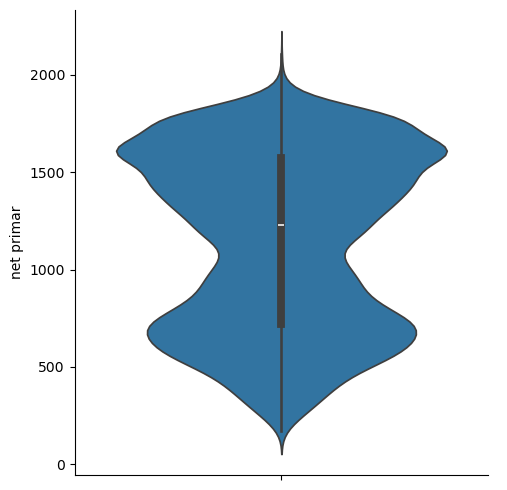

In [68]:
sns.catplot(p_rocks_and_climate, y='net primar', kind='violin')



<Axes: >

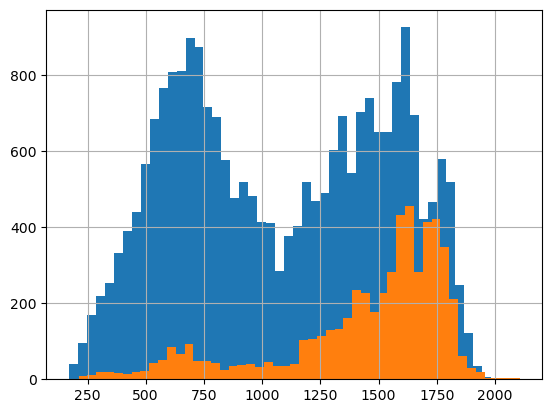

In [72]:
p_rocks_and_climate['net primar'][p_rocks_and_climate.p_karst==0].hist(bins=50)
p_rocks_and_climate['net primar'][p_rocks_and_climate.p_karst>0].hist(bins=50)


In [73]:
p_rocks_and_climate.rocktype1.unique()

array(['dolostone (dolomite)', nan, 'shale', 'limestone', 'sandstone',
       'carbonate', 'sand', 'clay or mud', 'siltstone', 'argillite',
       'conglomerate', 'mixed clastic/carbonate', 'calcarenite',
       'mudstone', 'marble', 'silt', 'residuum',
       'fine-grained mixed clastic', 'medium-grained mixed clastic',
       'meta-argillite', 'chert', 'schist', 'mica schist', 'slate',
       'clastic', 'dolostone', 'arkose', 'gneiss', 'olistostrome',
       'metasedimentary rock', 'arenite', 'quartzite', 'calcareous sand',
       'calc-silicate rock', 'sedimentary rock', 'phyllite', 'claystone',
       'biotite gneiss', 'mylonite', 'black shale', 'greenstone',
       'serpentinite', 'Sandstone', 'gravel', 'rhyolite', 'hornfels',
       'terrace', 'dolomite', 'landslide', 'graywacke', 'orthoquartzite',
       'melange'], dtype=object)

In [74]:
limestones = p_rocks_and_climate_no_zeros[p_rocks_and_climate.rocktype1=='limestone']
sandstones = p_rocks_and_climate_no_zeros[p_rocks_and_climate.rocktype1=='sandstone']
shale = p_rocks_and_climate_no_zeros[p_rocks_and_climate.rocktype1=='shale']
dolomite = p_rocks_and_climate_no_zeros[p_rocks_and_climate.rocktype1=='dolostone (dolomite)']

/tmp/ipykernel_411263/1195931056.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  limestones = p_rocks_and_climate_no_zeros[p_rocks_and_climate.rocktype1=='limestone']
/tmp/ipykernel_411263/1195931056.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sandstones = p_rocks_and_climate_no_zeros[p_rocks_and_climate.rocktype1=='sandstone']
/tmp/ipykernel_411263/1195931056.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  shale = p_rocks_and_climate_no_zeros[p_rocks_and_climate.rocktype1=='shale']
/tmp/ipykernel_411263/1195931056.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dolomite = p_rocks_and_climate_no_zeros[p_rocks_and_climate.rocktype1=='dolostone (dolomite)']


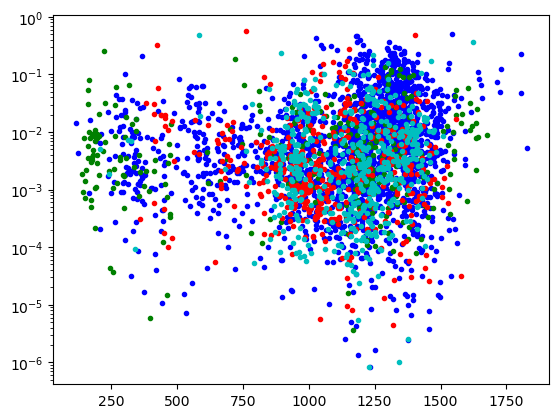

In [81]:

plt.semilogy(limestones['annual pre'], limestones.p_karst, '.', color='b')
plt.semilogy(sandstones['annual pre'], sandstones.p_karst, '.', color='g')
plt.semilogy(shale['annual pre'], shale.p_karst, '.', color='r')
plt.semilogy(dolomite['annual pre'], dolomite.p_karst, '.', color='c')

(1e-06, 1)

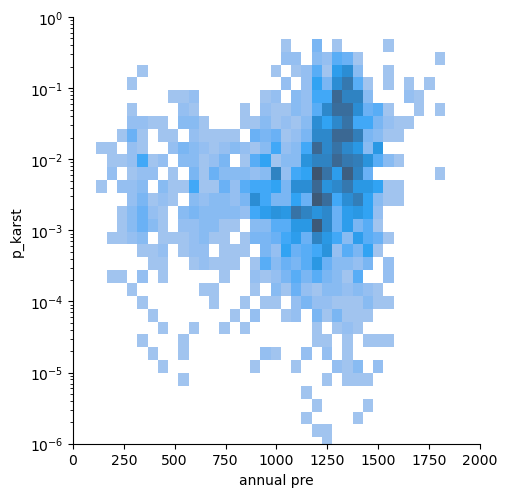

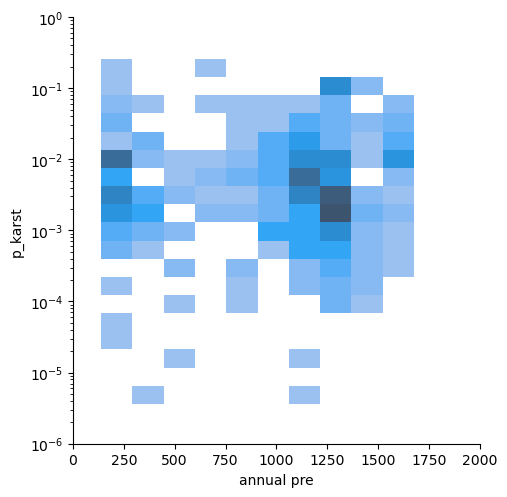

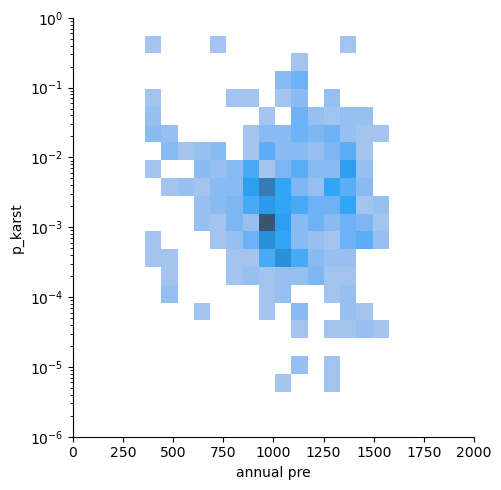

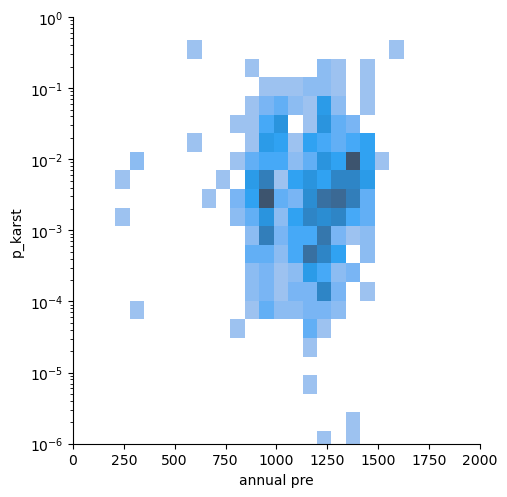

In [87]:
sns.displot(x=limestones['annual pre'], y=limestones.p_karst, log_scale=(False, True))
plt.xlim(0,2000)
plt.ylim(1e-6,1)
sns.displot(x=sandstones['annual pre'], y=sandstones.p_karst, log_scale=(False, True))
plt.xlim(0,2000)
plt.ylim(1e-6,1)
sns.displot(x=shale['annual pre'], y=shale.p_karst, log_scale=(False, True))
plt.xlim(0,2000)
plt.ylim(1e-6,1)
sns.displot(x=dolomite['annual pre'], y=dolomite.p_karst, log_scale=(False, True))
plt.xlim(0,2000)
plt.ylim(1e-6,1)
#plt.semilogy(sandstones['annual pre'], sandstones.p_karst, '.', color='g')
#plt.semilogy(shale['annual pre'], shale.p_karst, '.', color='r')
#plt.semilogy(dolomite['annual pre'], dolomite.p_karst, '.', color='c')

### Testing planetary computer to get soils data

Seems like it will be very slow. Perhaps better to work with csv files of tables.

In [11]:
#geom = p_karst_df.iloc[0].geometry
p_karst_WGS84 = p_karst_df.to_crs('WGS84')
geom = p_karst_WGS84.iloc[0]


In [16]:
import shapely
huc_json = shapely.to_geojson(geom)


In [4]:
#huc_json = p_karst_df.iloc[[0]].to_json()

In [41]:
import pystac_client
import planetary_computer
import rioxarray

In [5]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)


In [6]:
time_range = "2020-12-01/2020-12-31"
bbox = [-122.2751, 47.5469, -121.9613, 47.7458]

search = catalog.search(collections=["landsat-c2-l2"], bbox=bbox, datetime=time_range)
items = search.get_all_items()
len(items)


/home/mcoving/anaconda3/envs/geo/lib/python3.9/site-packages/pystac_client/item_search.py:851: FutureWarning: get_all_items() is deprecated, use item_collection() instead.
  warnings.warn(


8

In [33]:
search = catalog.search(collections=["gnatsgo-rasters"], intersects=huc_json)
#search.item_collection()

In [35]:
items = list[search.item_collection()]
raster_item = items[0]
raster_item.assets.keys()

TypeError: There are no type variables left in list[<pystac.item_collection.ItemCollection object at 0x7fddc3ae2c10>]

In [37]:
items = search.item_collection_as_dict()

In [38]:
items

{'type': 'FeatureCollection',
 'features': [{'id': 'conus_1084485_1089185_1248325_925345',
   'bbox': [-84.60810697, 30.62894985, -82.66783607, 32.27931226],
   'type': 'Feature',
   'links': [{'rel': 'collection',
     'type': 'application/json',
     'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/gnatsgo-rasters'},
    {'rel': 'parent',
     'type': 'application/json',
     'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/gnatsgo-rasters'},
    {'rel': 'root',
     'type': 'application/json',
     'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/'},
    {'rel': 'self',
     'type': 'application/geo+json',
     'href': 'https://planetarycomputer.microsoft.com/api/stac/v1/collections/gnatsgo-rasters/items/conus_1084485_1089185_1248325_925345'},
    {'rel': 'handbook',
     'href': 'https://www.nrcs.usda.gov/wps/PA_NRCSConsumption/download?cid=nrcs142p2_051847&ext=pdf',
     'type': 'application/pdf',
     'title': 'gSSURGO U

In [40]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

search = catalog.search(
    collections=["gnatsgo-rasters"],
    intersects=huc_json,
)
items = list(search.get_items())
print(f"Returned {len(items)} item")
raster_item = items[0]
print(list(raster_item.assets.keys()))

/home/mcoving/anaconda3/envs/geo/lib/python3.9/site-packages/pystac_client/item_search.py:836: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


Returned 1 item
['mukey', 'aws0_5', 'soc0_5', 'tk0_5a', 'tk0_5s', 'aws0_20', 'aws0_30', 'aws5_20', 'soc0_20', 'soc0_30', 'soc5_20', 'tk0_20a', 'tk0_20s', 'tk0_30a', 'tk0_30s', 'tk5_20a', 'tk5_20s', 'aws0_100', 'aws0_150', 'aws0_999', 'aws20_50', 'droughty', 'nccpi3sg', 'soc0_100', 'soc0_150', 'soc0_999', 'soc20_50', 'tk0_100a', 'tk0_100s', 'tk0_150a', 'tk0_150s', 'tk0_999a', 'tk0_999s', 'tk20_50a', 'tk20_50s', 'aws50_100', 'musumcpct', 'nccpi3all', 'nccpi3cot', 'nccpi3soy', 'pwsl1pomu', 'rootznaws', 'rootznemc', 'soc50_100', 'tk50_100a', 'tk50_100s', 'aws100_150', 'aws150_999', 'musumcpcta', 'musumcpcts', 'nccpi3corn', 'pctearthmc', 'soc100_150', 'soc150_999', 'tk100_150a', 'tk100_150s', 'tk150_999a', 'tk150_999s', 'tilejson', 'rendered_preview']


In [43]:
raster_item

<Item id=conus_1084485_1089185_1248325_925345>

In [46]:
signed_asset = raster_item.assets["soc0_20"]
data = (
    rioxarray.open_rasterio(signed_asset.href)
    .squeeze()
    .drop("band")
    .coarsen({"y": 8, "x": 8})
    .mean()
)

print(raster_item.assets["soc0_20"].description)
data.plot.imshow(vmin=0, add_labels=False)

TypeError: '>=' not supported between instances of 'float' and 'Polygon'